In [82]:
import os
import sys
import importlib
import matplotlib.pyplot as plt
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import plotter
import numpy as np

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

In [78]:
cpeb4     = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_7D  = 'MGDYGFGVLVQSNTGNKDAFPVRFHPHLQPPHHHQNADPDPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLDPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRDPADPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSDAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_12D = 'MGDYGFGVLVQSNTGNKDAFPVRFHPHLQPPHHHQNADPDPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLDPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRDPADPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGIDPLNDIDPLKKNFASNHIQLQKYARPSDAFAPKDWMEDDLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_d4  = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'

**Available Runs**

In [79]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)
idx = plotty.make_index(force_update=True);
print(idx[['Protein','I','Eps','Scale']])

      Protein    I Eps  Scale
0   12D_CPEB4   10  10   1.00
1   12D_CPEB4  400  10   1.00
2   12D_CPEB4   10  80   0.80
3   12D_CPEB4  400  80   0.80
4   12D_CPEB4   10  80   1.00
5   12D_CPEB4  400  80   1.00
6    7D_CPEB4   10  10   1.00
7    7D_CPEB4  400  10   1.00
8    7D_CPEB4   10  80   0.80
9    7D_CPEB4  400  80   0.80
10   7D_CPEB4   10  80   1.00
11   7D_CPEB4  400  80   1.00
12      CPEB4   13  10   0.55
13      CPEB4    1  10   0.55
14      CPEB4   13  10   0.70
15      CPEB4    1  10   0.70
16      CPEB4   13  10   0.85
17      CPEB4    1  10   0.85
18      CPEB4   13  10   1.00
19      CPEB4    1  10   1.00
20      CPEB4   10  10   1.00
21      CPEB4  400  10   1.00
22      CPEB4   10  80   0.80
23      CPEB4  400  80   0.80
24      CPEB4   10  80   1.00
25      CPEB4  400  80   1.00
26      CPEB4   95  80   1.00
27      CPEB4   25  80   0.55
28      CPEB4   25  80   0.70
29      CPEB4   25  80   0.85
30      CPEB4   25  80   1.00
31      CPEB4  400  80   0.55
32      CP

### Effect of charges (low ε, low I) on variants

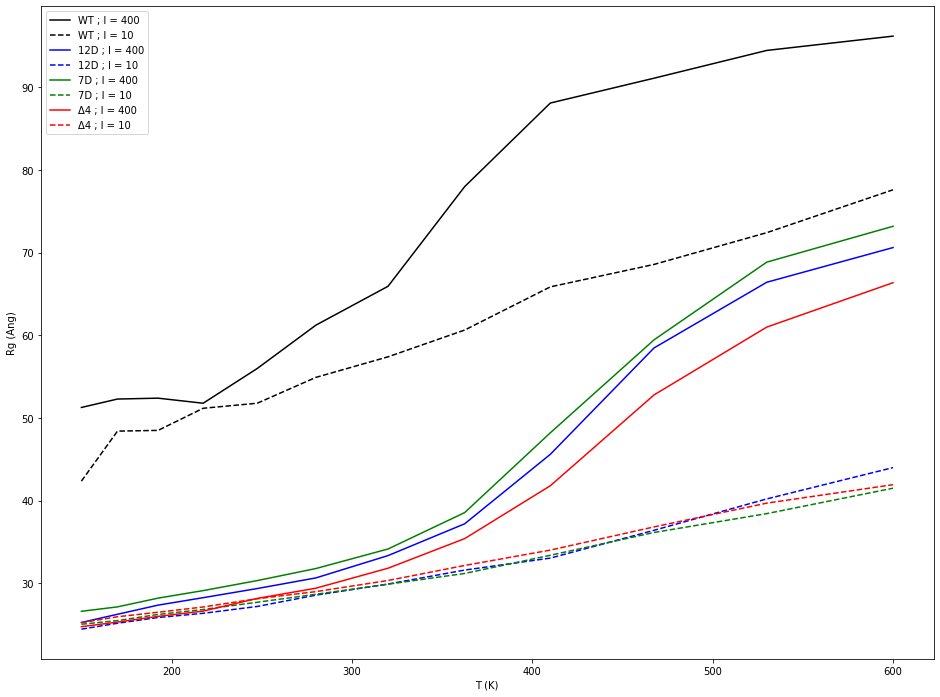

In [80]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=10, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=10, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=10, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=10, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=10, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=10, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=10, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=10, ls=1.00, label='\u03944 ; I = 10', style='--r')

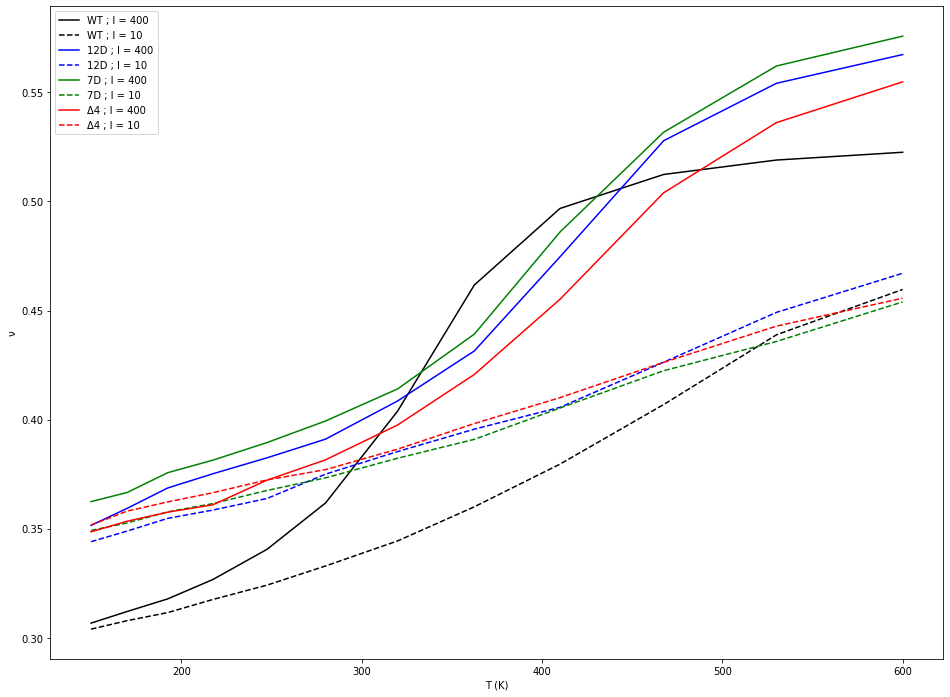

In [83]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=10, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=10, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=10, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=10, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=10, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=10, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=10, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=10, ls=1.00, label='\u03944 ; I = 10', style='--r')

### Effect of I on variants

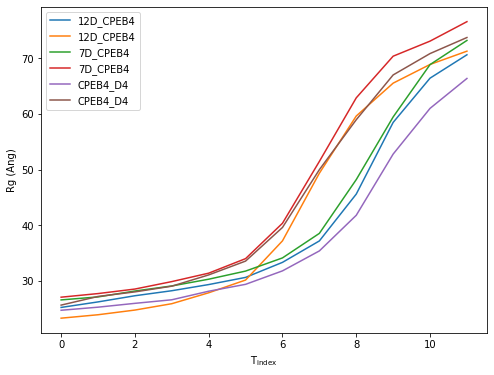

In [64]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', style='--r')

In [ ]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', style='--r')

### Effect of Hydrophobicity on variants

In [ ]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', style='--r')

In [ ]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', style='--r')

### λ = 0

In [ ]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', style='--r')